<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/DistributionsOfAspectsOfData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline
- Introduction (Purpose + scope)
- Body
  - Define random generation setup .
  - Define the random generation process.
  - show prespectives on looking at data
  - Plot the distributions of data from different prespectives
- Conclusion: It can help define SE and beta, building up on this new view


###Introduction

This is for people who are trying to learn statistic concepts, particularly Linear Regression concepts.

I am reading [ISLP book](https://www.statlearning.com/), so I assume this notebook would be extra helpful for people who are reading that book.

ISLP doesn't get into too much technical detail, and rightly so. However, depending on what question arises for you while reading it, you might need to dive deeper a bit.

This notebook is an attempt to generate random data. Later on I am going to use randomely generated data to do step by step calculations for formulas in the book. For example I would like to calculate $\beta_0$ or $SE(\beta_0)$ for given set of observation.


When defining statistic formulas, there are often assumptions in work that are not stated explicitly. For example for a lot of the formulas  to be strictly valid, we need to assume that the errors $\epsilon_i$ for each observation have common variance $σ^2$ and are uncorrelated(ISLP page 78).

What does this exactly mean to the errors $\epsilon_i$ for each observation have common variance $σ^2$? I am going to explain it in work of generating the data.

### Setup
 In general, the object of our study can sound very similar on surface, but cofusing them with each other, causes lack of understanding as we move forward. Moreover, Changing small detail about how things are setup can change formulas.So it is important to explicitly explain the details about setup and terminology.

Each data point is tuple $(x, y)$. $x$ is the predictor and $y$ is the response. $x$ can have multiple dimensions, $y$ usually is just an scalar. When we look at the set of such $x$ and $y$'s, they can get subscripts (i.e., $(x_i, y_i)$ is the i-th observation).



Two important terminology: first one is **Population** and second one is Set of **Observations**. Populations is set of alllll exisiting data points that ever existed, while set of Observations is the ones we sampled and observed. The difference between them is important when we define measures of accuracy of fit.

Why is it important? Mostly because of theoritical assumptions we use to come up with proofs and formulas such as the one for $SE(\beta_0)$. While for an ISLP reader the detailed proof might not be that important, but to understand why formulas makes any sens, it is important to know these differences and some of the assumptions.

In this notbook I am going to generate the population data set. At the end I sample a set of observations. And along the way I throw as many graph as I can at you just to see different way of looking at population data set.  


### Data Generation Process
As I mentioned above, I am going to generate a *population* set of data points, that is not to be confused with set of Observed data.

Data points are $(x, y)$ where $x$ is one dimensional in range of 1 to 10

In [1]:
import numpy as np
# x_i's are from 1 to 10
X = np.linspace(1, 10, 30)
X

array([ 1.        ,  1.31034483,  1.62068966,  1.93103448,  2.24137931,
        2.55172414,  2.86206897,  3.17241379,  3.48275862,  3.79310345,
        4.10344828,  4.4137931 ,  4.72413793,  5.03448276,  5.34482759,
        5.65517241,  5.96551724,  6.27586207,  6.5862069 ,  6.89655172,
        7.20689655,  7.51724138,  7.82758621,  8.13793103,  8.44827586,
        8.75862069,  9.06896552,  9.37931034,  9.68965517, 10.        ])

I generated 30 different $x$ values, between 0 and 1, all equally spaced. Generating $x$'s was simple, nothing intricate or random.

How to generate $y$'s though? Well, $y$'s need to meet several cirteria.
1. They are roughly equal to multiple of $x$ plus a constant. Let's say $y_i ≈ B_1 * x_i + B_0$.
2. The different between $y_i$ and $B_1 * x_i + B_0$ forms a normal distribution with variance $σ^2$. Lets call this difference error $ϵ_i$.
3.  Errors $ϵ_i$ for each observation have common variance  $σ^2$.

I think of the third rule as a simplifying assumption, as it makes the generation easier.

It's a bit vague though. As I mentioned, main purpose of this notbook is to clarify details like this in the process of making things.

So lets start generating data by having 3rd criteria in mind.

As for the constants, lets $\beta_0= 4$  , $\beta_1=2$ We generate `n_repeat`=1000  $y$'s for each observation $x_i$ (i.e. At the end of proccess a population of total size  `n_repeat * len(X)` is generated.)

In [3]:
# generate yi's randomely. defining constants
B0 = 4
B1 = 2
# change n_ops with repeat
n_repeat = 10000 # number of observation for individual x_i's
print(X[0])

1.0


I start with  generating responses for observations that predictor $X=x_1$ . Now what exatly has a normal distribution here? The distribution of responses $y$ for $x_1$ ?

The answer is yes. What is the distribution parameters for that? Namely $\mu$ and $\sigma^2$.

Since we would like to generate $y$ values around the population regression line ($y = \beta_0 + \beta_1 . x= 2 . x + 4 $ ), lets set $\mu$ to 6.

As for $\sigma^2$, value of 1 would work.


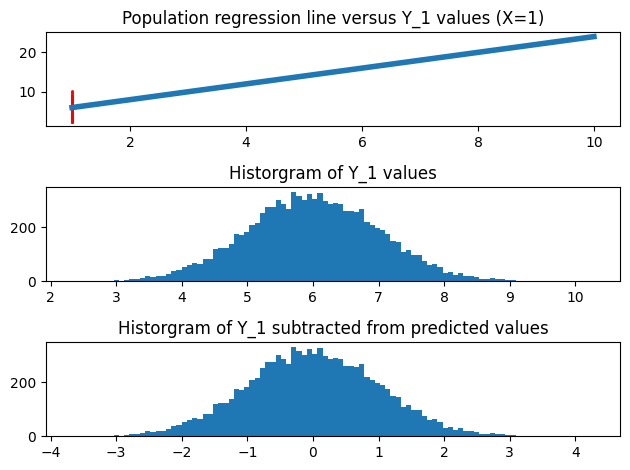

In [4]:
# Y = 2 * X + 4 + epsilon
# epsilon ~ N(0, 1)
import numpy as np
x_1 = X[0]
y_1 = 2 * x_1 + 4 + np.random.normal(0, 1, n_repeat)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3)
ax0 = axes[0]
ax1 = axes[1]
ax2= axes[2]



ax0.scatter([x_1] * n_repeat, y_1, s=1, c='red')
ax0.scatter?
ax0.plot(X, B1 * X + B0, linewidth=4)
ax0.set_title('Population regression line versus Y_1 values (X=1)')

ax1.hist(y_1, bins = 100);
ax1.set_title('Historgram of Y_1 values')

ax2.hist(y_1 - [(x_1 * B1 + B0)] * n_repeat, bins=100);
ax2.set_title('Historgram of Y_1 subtracted from predicted values')
plt.tight_layout()

Notice a couple of things about the graphs.
In the second graph from the top, what is the $\mu$  or mean for y values, and why?
The mean value is equal to 6, that is the value that population regression model predicts.



What about third graph from the top?
It looks pretty much like the second graph, except for it's mean value is 0.

Finally let's take a look at first graph from the top that is values of y vs values of x. It is just a stack of dots, that form a line parallel to y-axes. so we know there is no one-to-one relationship between x's and y's.

Maybe it would be good to take a look at X distribution as well, what does it look like? is it also Gaussian?








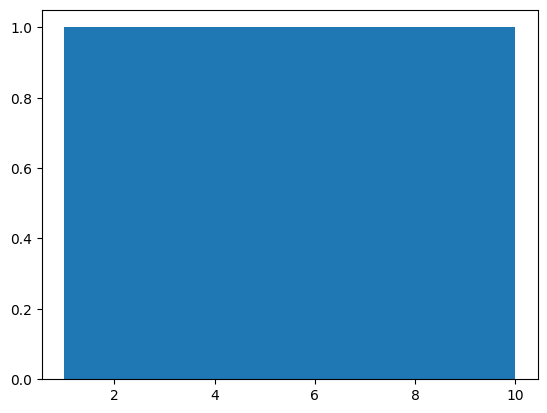

In [10]:
fig, ax = plt.subplots()
X.shape
ax.hist(X, bins=30);

It is just a block. In fact X is an independent value. In our case we did not use much of randomness to generate it.

An animation from first graph from the top and second graph from the top would be Helpful HERE.


I generated several $y_i$ for one $x_i$. Notice x-axis. Y values for $x_1 = 1$ range from 3 to 9.
Let's add this to set of $y$'s.


In [ ]:
#
Y = np.zeros(shape=(y_1.shape[0]*  X.shape[0]))
Y[0:y_1.shape[0]] = y_1 # subindex
# filter elements more than 1
len(Y [ Y >= 1])


10000

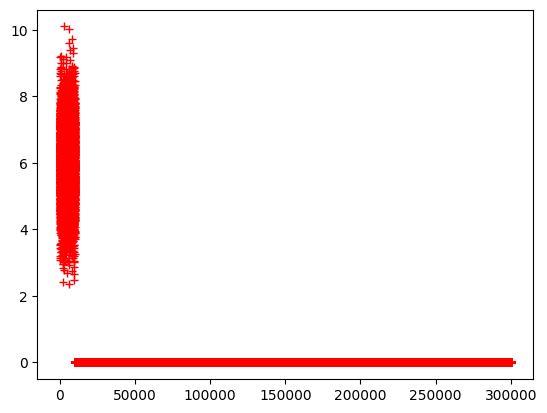

In [ ]:
plt.plot?
plt.plot(Y, 'r+')

Let's repeate generating Y value for rest of X.


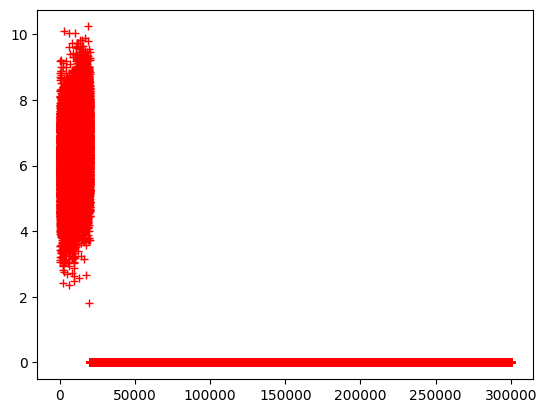

In [ ]:
x_2 = X[1]
y_2 = 2 * x_2 + 4 + np.random.normal(0, 1, 10000)
Y[n_obs * 1: 2 * y_1.shape[0]] = y_2
plt.plot(Y, 'r+')
# the y's are taking off from 0

You see Y is getting filled with more non-zero stuff. Let's see $Y_2$ histogram. quite similar to $Y_1$'s.

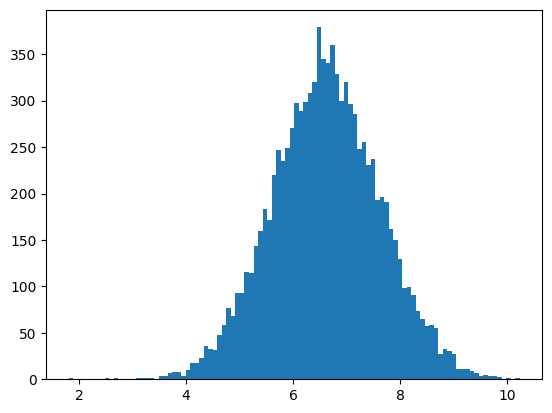

In [ ]:
plt.hist(y_2, bins = 100);

Now let's repeate y-value generation for all X's

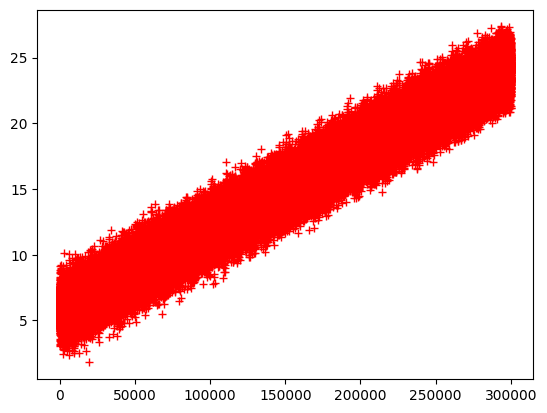

In [ ]:
# y_i.shape[0] = n_observations for one x_i
for i in range(2, X.shape[0]):
  # print(X[i])
  Y[i * n_obs: (i + 1) * y_1.shape[0]] = B1 * X[i] + B0 + np.random.normal(0, 1, n_obs)

plt.plot(Y, 'r+')

Yay, I filled in Y with n_observations times length of X entries.
Notice we observed n_observations samples for a given x_i. Total observations is n_observations number of x_i's.

Is it a good assumption in real example? no idea.

In [ ]:
# add the true regression line in blue